In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import xgboost as xgb


df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv')


C:\Users\arell\AppData\Local\Temp\ipykernel_14516\1531081349.py:11: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv')


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:04:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Binary Classification Report (Benign vs Malicious) with Threshold - Training Data:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    299672
           1       1.00      0.83      0.90    156161

    accuracy                           0.94    455833
   macro avg       0.96      0.91      0.93    455833
weighted avg       0.94      0.94      0.94    455833

Binary Classification Accuracy with Threshold (Training): 0.9399363363337011

Binary Classification Report (Benign vs Malicious) with Threshold - Test Data:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    128431
           1       1.00      0.83      0.90     66927

    accuracy                           0.94    195358
   macro avg       0.96      0.91      0.93    195358
weighted avg       0.94      0.94      0.94    195358

Binary Classification Accuracy with Threshold (Test): 0.9397465166514809
Unique labels after re-encoding: 

c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:05:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Multiclass Classification Report (Malicious Type) - Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     67520
           1       1.00      0.97      0.98     22764
           2       0.99      0.99      0.99     65877

    accuracy                           0.99    156161
   macro avg       0.99      0.98      0.99    156161
weighted avg       0.99      0.99      0.99    156161

Multiclass Classification Accuracy (Training): 0.9901960156505145

Multiclass Classification Report (Malicious Type) - Test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     28937
           1       0.99      0.96      0.98      9756
           2       0.98      0.98      0.98     28234

    accuracy                           0.99     66927
   macro avg       0.99      0.98      0.98     66927
weighted avg       0.99      0.99      0.99     66927

Multiclass Classification Accuracy (Test

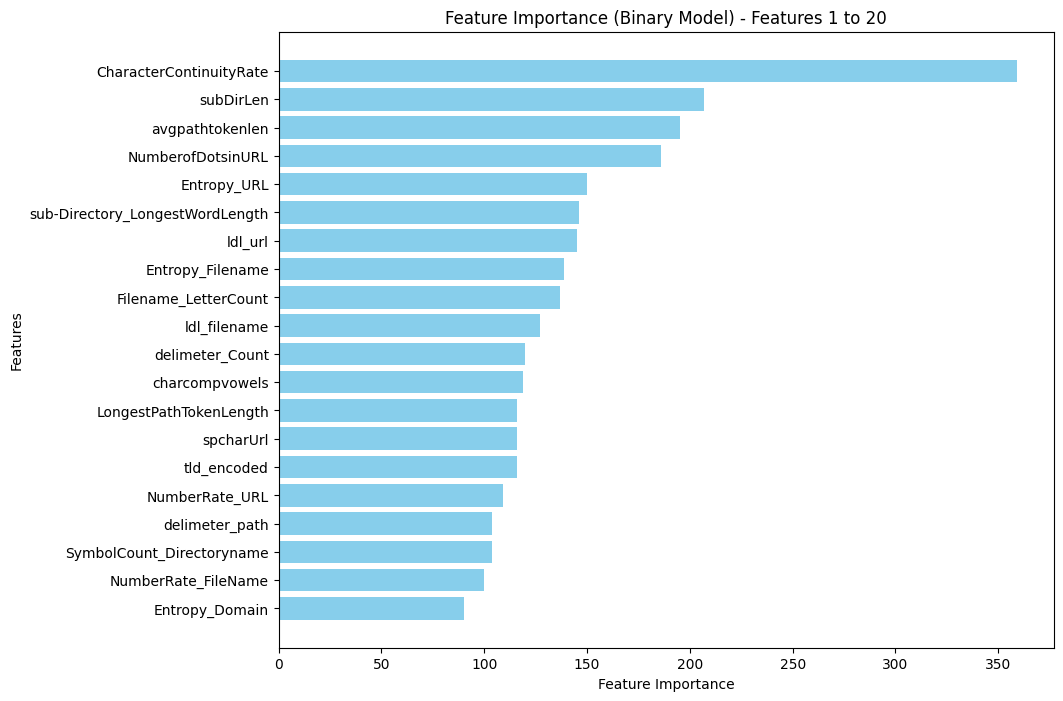

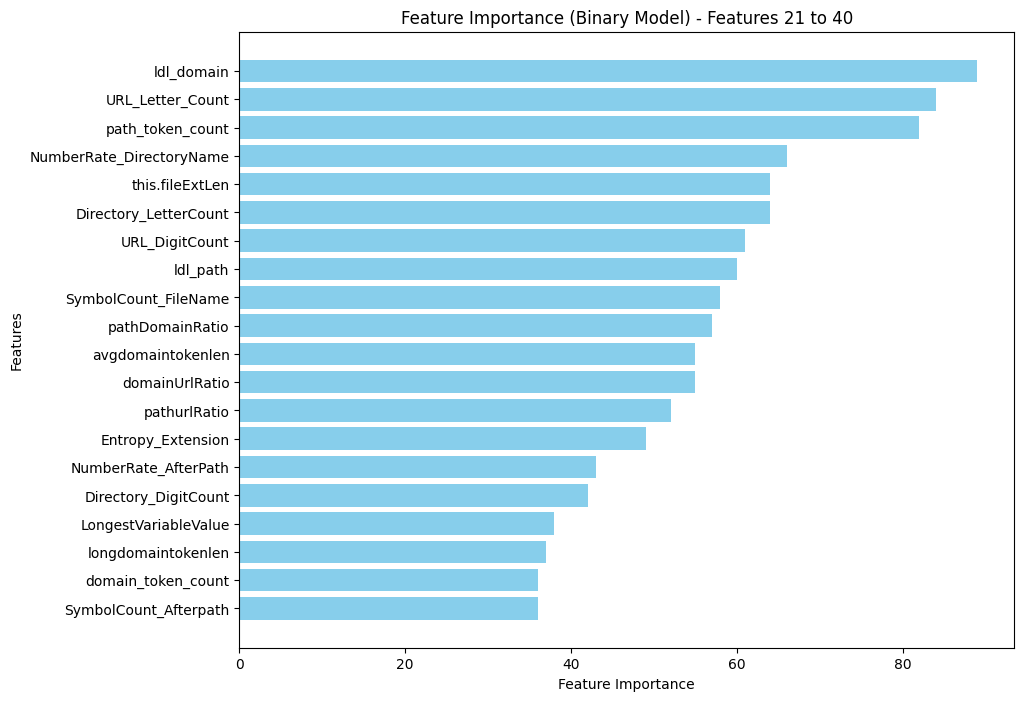

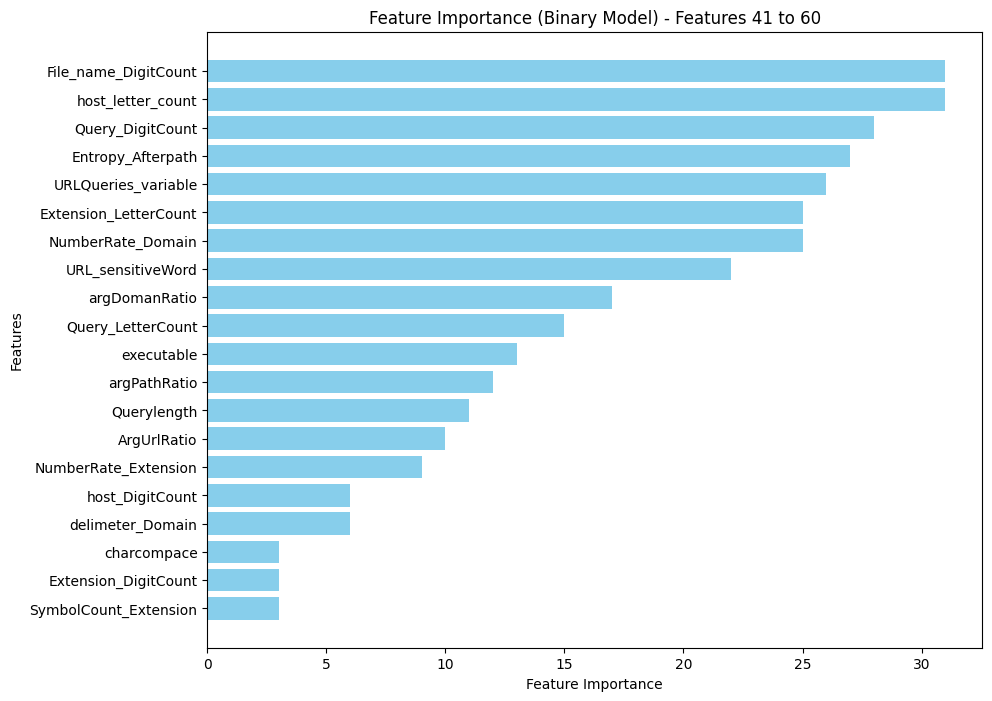

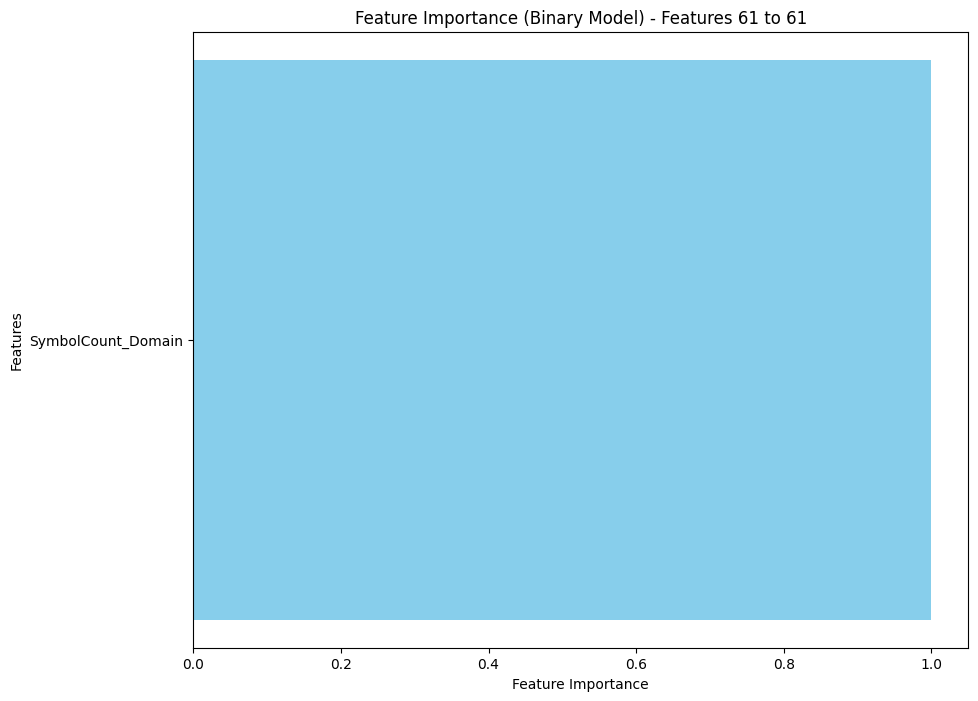


--- Feature Importance for Multiclass Classification Model ---


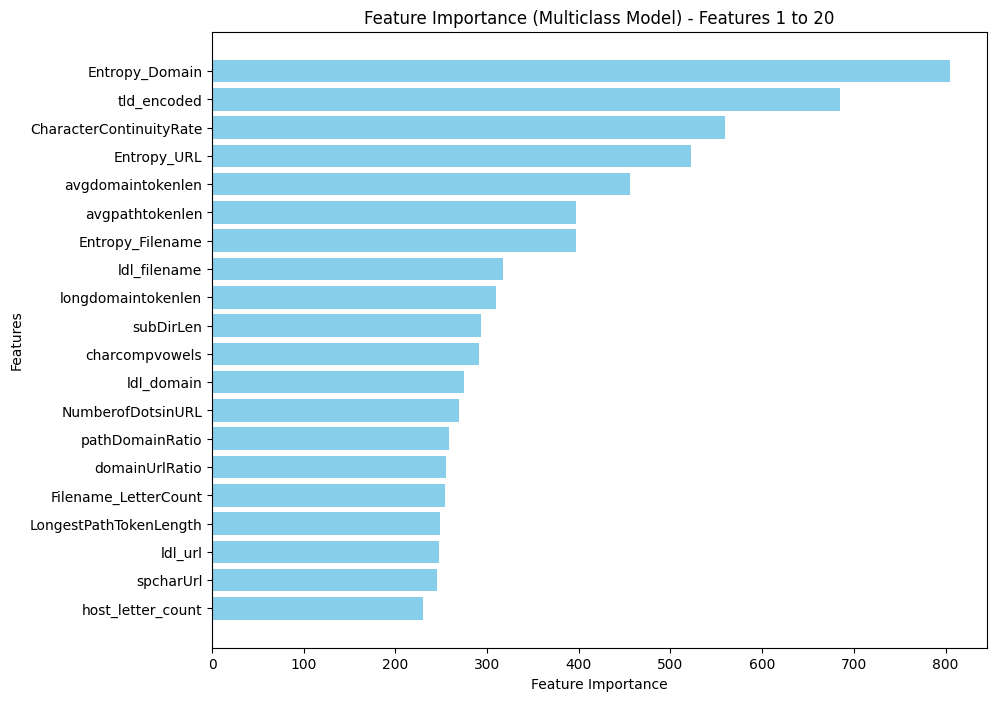

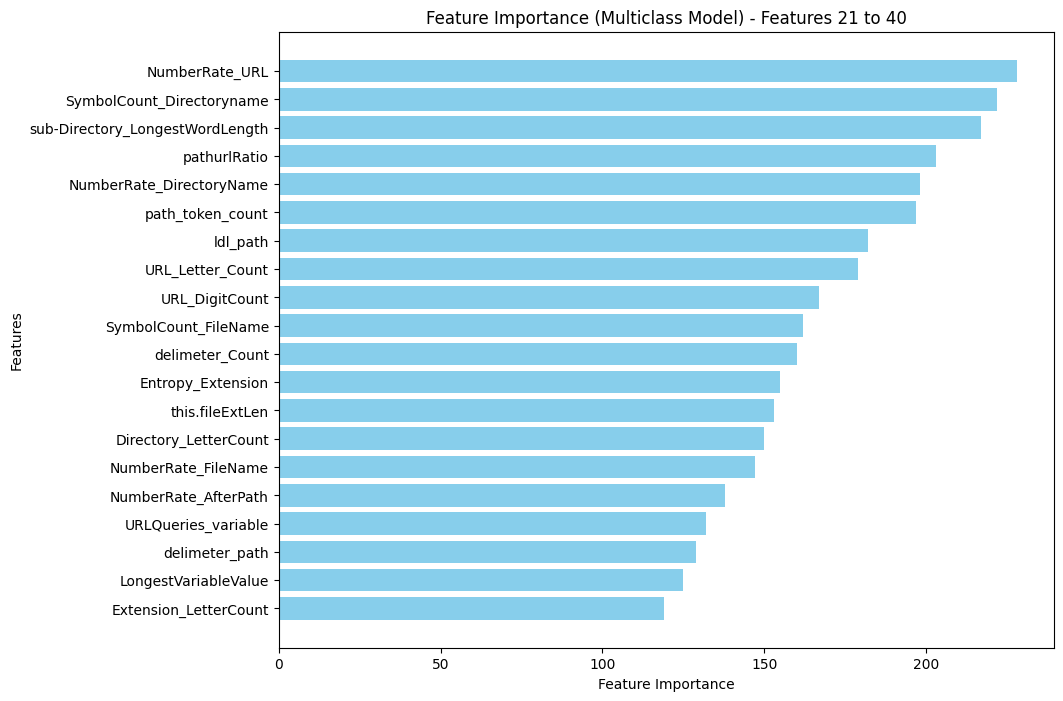

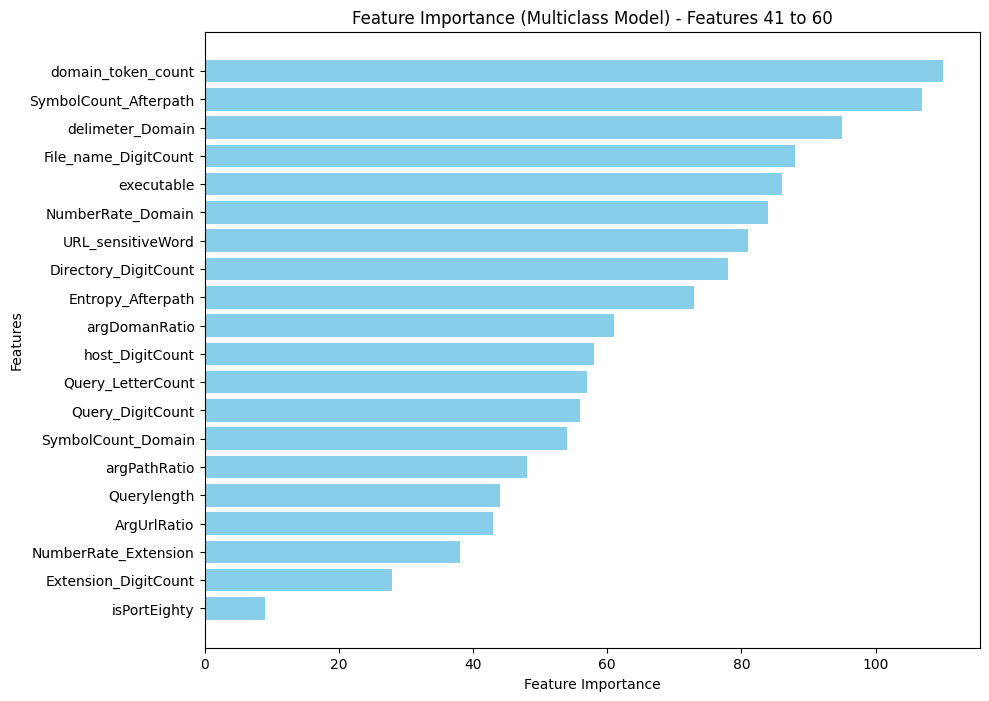

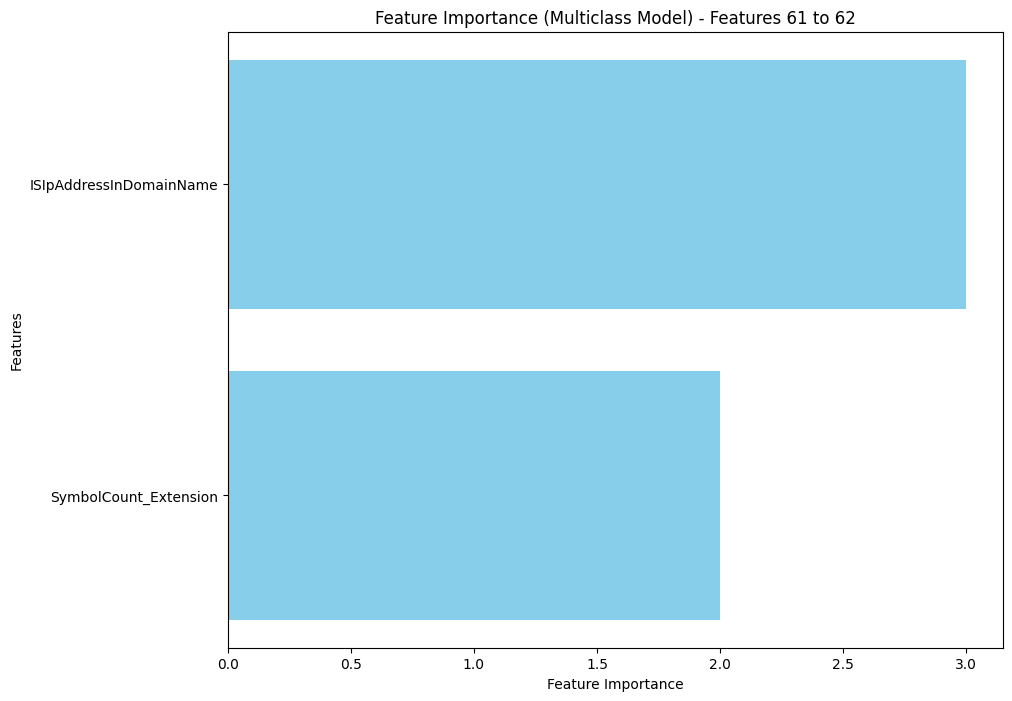


Overall Results Summary:
Binary Classification - Training Accuracy: 0.9399
Binary Classification - Test Accuracy: 0.9397
Multiclass Classification - Training Accuracy: 0.9902
Multiclass Classification - Test Accuracy: 0.9851


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Extension
import joblib
import os

# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\old_malicious_2021.csv', low_memory=False)

# Select features and target columns
features = ['Querylength', 'domain_token_count', 'path_token_count',
            'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
            'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
            'ldl_filename', 'ldl_getArg', 'dld_domain', 'dld_path',
            'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
            'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
            'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
            'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
            'ISIpAddressInDomainName', 'CharacterContinuityRate',
            'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
            'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
            'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
            'Directory_LetterCount', 'Filename_LetterCount',
            'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength',
            'Domain_LongestWordLength', 'Path_LongestWordLength',
            'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',
            'URL_sensitiveWord', 'URLQueries_variable', 'spcharUrl',
            'delimeter_Domain', 'delimeter_path', 'delimeter_Count',
            'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_DirectoryName',
            'NumberRate_FileName', 'NumberRate_Extension', 'NumberRate_AfterPath',
            'SymbolCount_URL', 'SymbolCount_Domain', 'SymbolCount_Directoryname',
            'SymbolCount_FileName', 'SymbolCount_Extension',
            'SymbolCount_Afterpath', 'Entropy_URL', 'Entropy_Domain', 'Entropy_Filename', 'Entropy_Extension',
            'Entropy_Afterpath', 'url_type']

# Clean the dataset by removing NaNs and infinities in numeric columns only
df_cleaned = df.copy()

# Convert 'tld' and 'url_type' to string since they're categorical
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

# Select only numeric features for checking infinite values
numeric_features = [f for f in features if f not in ['tld', 'url_type']]

# Apply np.isfinite only to numeric features and filter rows
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

# Label encoding for TLD and url_type (since they're categorical)
label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()

df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

# Combine all features (numeric + 'tld_encoded') for the model
X = df_cleaned[numeric_features + ['tld_encoded']]

# Binary classification: Benign vs Malicious
df_cleaned['binary_label'] = df_cleaned['url_type'].apply(lambda x: 0 if x == 'benign' else 1)

# Train-Test Split for Binary Classification (Benign vs Malicious)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, df_cleaned['binary_label'], test_size=0.3, random_state=42, stratify=df_cleaned['binary_label']
)

# Initialize the XGBoost classifier for binary classification
xgb_binary_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training data for binary classification
xgb_binary_classifier.fit(X_train_bin, y_train_bin)

# Predict probabilities instead of direct class labels
y_train_pred_prob_bin = xgb_binary_classifier.predict_proba(X_train_bin)
y_test_pred_prob_bin = xgb_binary_classifier.predict_proba(X_test_bin)

# Set a custom threshold (e.g., 0.95)
threshold = 0.95

# Convert probabilities to class labels based on the custom threshold
y_train_pred_bin_threshold = (y_train_pred_prob_bin[:, 1] >= threshold).astype(int)
y_test_pred_bin_threshold = (y_test_pred_prob_bin[:, 1] >= threshold).astype(int)

# Evaluate the model with the custom threshold
print("Binary Classification Report (Benign vs Malicious) with Threshold - Training Data:")
print(classification_report(y_train_bin, y_train_pred_bin_threshold))
print("Binary Classification Accuracy with Threshold (Training):", accuracy_score(y_train_bin, y_train_pred_bin_threshold))

print("\nBinary Classification Report (Benign vs Malicious) with Threshold - Test Data:")
print(classification_report(y_test_bin, y_test_pred_bin_threshold))
print("Binary Classification Accuracy with Threshold (Test):", accuracy_score(y_test_bin, y_test_pred_bin_threshold))


# Multiclass Classification for types of malicious URLs
# Only consider the non-benign entries
malicious_df = df_cleaned[df_cleaned['binary_label'] == 1].copy()

# Apply LabelEncoder again to ensure the labels start from 0
malicious_df['url_type_encoded'] = label_encoder_url_type.fit_transform(malicious_df['url_type'])

# Check unique labels
print("Unique labels after re-encoding:", malicious_df['url_type_encoded'].unique())

# Use the 'url_type_encoded' column for the target
X_multi = malicious_df[numeric_features + ['tld_encoded']]
y_multi = malicious_df['url_type_encoded']
# Train-Test Split for Multiclass Classification
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

# Initialize the XGBoost classifier for multiclass classification
xgb_multiclass_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the model on the training data for multiclass classification
xgb_multiclass_classifier.fit(X_train_multi, y_train_multi)

# Predict on multiclass data
y_train_pred_multi = xgb_multiclass_classifier.predict(X_train_multi)
y_test_pred_multi = xgb_multiclass_classifier.predict(X_test_multi)

# Evaluate the multiclass model
print("\nMulticlass Classification Report (Malicious Type) - Training Data:")
print(classification_report(y_train_multi, y_train_pred_multi))
print("Multiclass Classification Accuracy (Training):", accuracy_score(y_train_multi, y_train_pred_multi))

print("\nMulticlass Classification Report (Malicious Type) - Test Data:")
print(classification_report(y_test_multi, y_test_pred_multi))
print("Multiclass Classification Accuracy (Test):", accuracy_score(y_test_multi, y_test_pred_multi))

# Function to plot feature importance in batches of 20
def plot_feature_importance(importance, features, features_per_plot=20, model_type='binary'):
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    features_sorted, scores = zip(*sorted_importance)

    # Plot in batches of 20
    num_features = len(features_sorted)
    for i in range(0, num_features, features_per_plot):
        plt.figure(figsize=(10, 8))
        plt.barh(features_sorted[i:i+features_per_plot], scores[i:i+features_per_plot], color='skyblue')
        plt.xlabel('Feature Importance')
        plt.ylabel('Features')
        plt.title(f'Feature Importance ({model_type.capitalize()} Model) - Features {i+1} to {min(i + features_per_plot, num_features)}')
        plt.gca().invert_yaxis()
        plt.show()

# Binary classification feature importance
print("\n--- Feature Importance for Binary Classification Model ---")
binary_importance = xgb_binary_classifier.get_booster().get_score(importance_type='weight')
plot_feature_importance(binary_importance, X.columns, model_type='binary')

# Multiclass classification feature importance
print("\n--- Feature Importance for Multiclass Classification Model ---")
multiclass_importance = xgb_multiclass_classifier.get_booster().get_score(importance_type='weight')
plot_feature_importance(multiclass_importance, X.columns, model_type='multiclass')

# Summary of overall results
print("\nOverall Results Summary:")
print(f"Binary Classification - Training Accuracy: {accuracy_score(y_train_bin, y_train_pred_bin_threshold):.4f}")
print(f"Binary Classification - Test Accuracy: {accuracy_score(y_test_bin, y_test_pred_bin_threshold):.4f}")
print(f"Multiclass Classification - Training Accuracy: {accuracy_score(y_train_multi, y_train_pred_multi):.4f}")
print(f"Multiclass Classification - Test Accuracy: {accuracy_score(y_test_multi, y_test_pred_multi):.4f}")


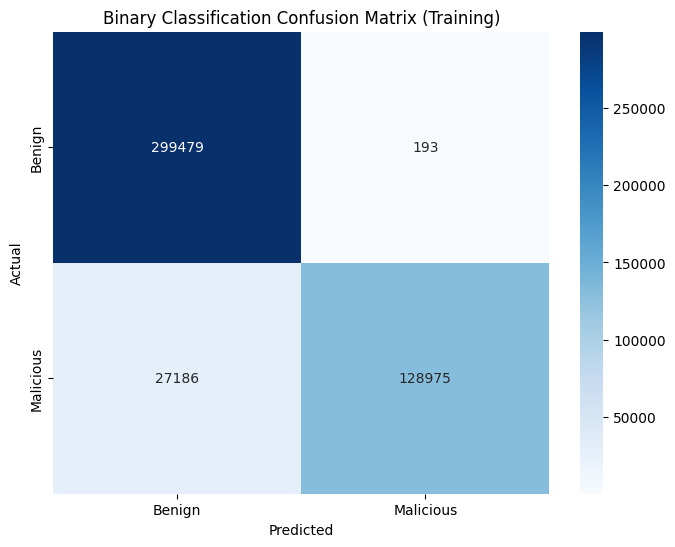

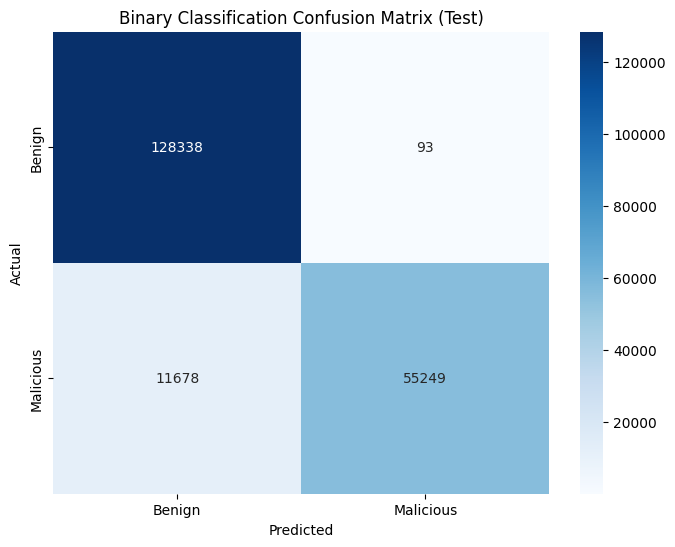

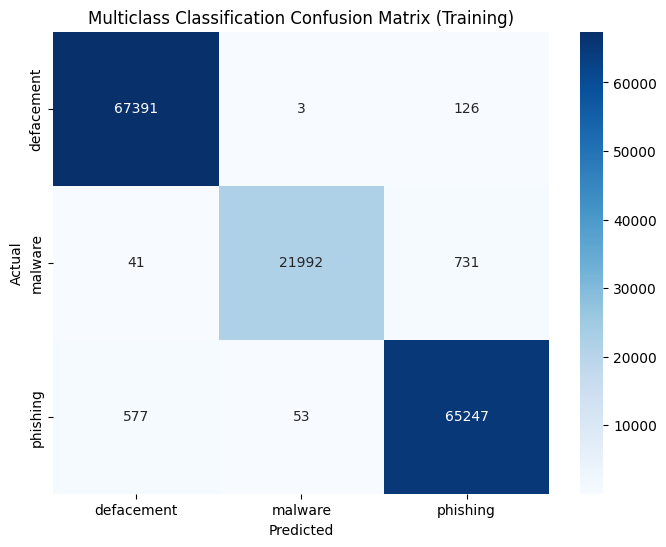

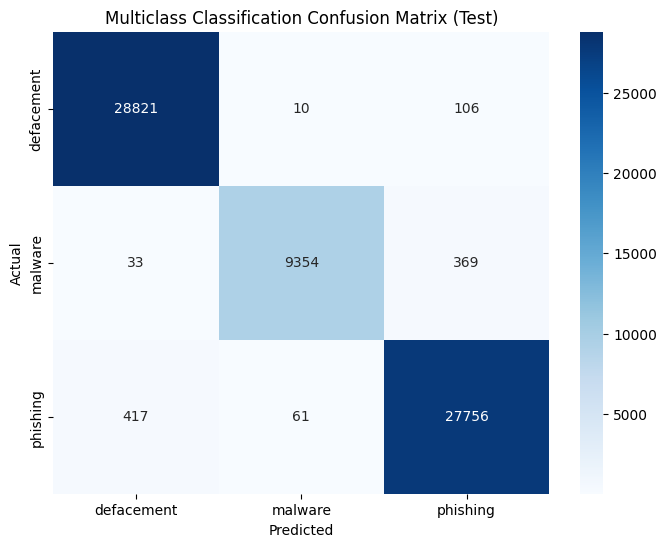

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title='Confusion Matrix', cmap='Blues'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# ----- Binary Classification Confusion Matrix -----

# Confusion matrix for training data
cm_train_bin = confusion_matrix(y_train_bin, y_train_pred_bin_threshold)
plot_confusion_matrix(cm_train_bin, labels=['Benign', 'Malicious'], title='Binary Classification Confusion Matrix (Training)')

# Confusion matrix for test data
cm_test_bin = confusion_matrix(y_test_bin, y_test_pred_bin_threshold)
plot_confusion_matrix(cm_test_bin, labels=['Benign', 'Malicious'], title='Binary Classification Confusion Matrix (Test)')


# ----- Multiclass Classification Confusion Matrix -----

# Get unique labels for the multiclass classification (from re-encoded labels)
unique_labels_multi = label_encoder_url_type.classes_

# Confusion matrix for multiclass training data
cm_train_multi = confusion_matrix(y_train_multi, y_train_pred_multi)
plot_confusion_matrix(cm_train_multi, labels=unique_labels_multi, title='Multiclass Classification Confusion Matrix (Training)')

# Confusion matrix for multiclass test data
cm_test_multi = confusion_matrix(y_test_multi, y_test_pred_multi)
plot_confusion_matrix(cm_test_multi, labels=unique_labels_multi, title='Multiclass Classification Confusion Matrix (Test)')


In [18]:
# Function to return top N features by importance
def get_top_features(importance, features, top_n=20):
    # Sort importance dictionary by values (importance scores)
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    
    # Get the top N features
    top_features = sorted_importance[:top_n]
    
    # Extract the feature names and scores separately
    features_sorted, scores = zip(*top_features)
    
    # Return the top feature names and their importance scores as a list of tuples
    return list(features_sorted), list(scores)

# Get the top 20 features from binary classification
binary_importance = xgb_binary_classifier.get_booster().get_score(importance_type='weight')
top_binary_features, top_binary_scores = get_top_features(binary_importance, X.columns, top_n=20)

# Print the top 20 binary classification features
print("\nTop 20 Binary Classification Features and Their Scores:")
for feature, score in zip(top_binary_features, top_binary_scores):
    print(f"{feature}: {score}")

# Get the top 20 features from multiclass classification
multiclass_importance = xgb_multiclass_classifier.get_booster().get_score(importance_type='weight')
top_multiclass_features, top_multiclass_scores = get_top_features(multiclass_importance, X.columns, top_n=20)

# Print the top 20 multiclass classification features
print("\nTop 20 Multiclass Classification Features and Their Scores:")
for feature, score in zip(top_multiclass_features, top_multiclass_scores):
    print(f"{feature}: {score}")

# If you want to save these features in a list, you can simply use:
top_20_binary_features_list = top_binary_features
top_20_multiclass_features_list = top_multiclass_features

print(f"top_20_binary_features_list")


Top 20 Binary Classification Features and Their Scores:
CharacterContinuityRate: 359.0
subDirLen: 207.0
avgpathtokenlen: 195.0
NumberofDotsinURL: 186.0
Entropy_URL: 150.0
sub-Directory_LongestWordLength: 146.0
ldl_url: 145.0
Entropy_Filename: 139.0
Filename_LetterCount: 137.0
ldl_filename: 127.0
delimeter_Count: 120.0
charcompvowels: 119.0
LongestPathTokenLength: 116.0
spcharUrl: 116.0
tld_encoded: 116.0
NumberRate_URL: 109.0
delimeter_path: 104.0
SymbolCount_Directoryname: 104.0
NumberRate_FileName: 100.0
Entropy_Domain: 90.0

Top 20 Multiclass Classification Features and Their Scores:
Entropy_Domain: 805.0
tld_encoded: 685.0
CharacterContinuityRate: 560.0
Entropy_URL: 522.0
avgdomaintokenlen: 456.0
avgpathtokenlen: 397.0
Entropy_Filename: 397.0
ldl_filename: 317.0
longdomaintokenlen: 310.0
subDirLen: 293.0
charcompvowels: 291.0
ldl_domain: 275.0
NumberofDotsinURL: 269.0
pathDomainRatio: 258.0
domainUrlRatio: 255.0
Filename_LetterCount: 254.0
LongestPathTokenLength: 249.0
ldl_url: 24

In [19]:
# Print the list of top 20 binary classification features
print("\nTop 20 Binary Classification Features:")
for i, feature in enumerate(top_20_binary_features_list, 1):
    print(f"{i}. {feature}")

# Print the list of top 20 multiclass classification features
print("\nTop 20 Multiclass Classification Features:")
for i, feature in enumerate(top_20_multiclass_features_list, 1):
    print(f"{i}. {feature}")


Top 20 Binary Classification Features:
1. CharacterContinuityRate
2. subDirLen
3. avgpathtokenlen
4. NumberofDotsinURL
5. Entropy_URL
6. sub-Directory_LongestWordLength
7. ldl_url
8. Entropy_Filename
9. Filename_LetterCount
10. ldl_filename
11. delimeter_Count
12. charcompvowels
13. LongestPathTokenLength
14. spcharUrl
15. tld_encoded
16. NumberRate_URL
17. delimeter_path
18. SymbolCount_Directoryname
19. NumberRate_FileName
20. Entropy_Domain

Top 20 Multiclass Classification Features:
1. Entropy_Domain
2. tld_encoded
3. CharacterContinuityRate
4. Entropy_URL
5. avgdomaintokenlen
6. avgpathtokenlen
7. Entropy_Filename
8. ldl_filename
9. longdomaintokenlen
10. subDirLen
11. charcompvowels
12. ldl_domain
13. NumberofDotsinURL
14. pathDomainRatio
15. domainUrlRatio
16. Filename_LetterCount
17. LongestPathTokenLength
18. ldl_url
19. spcharUrl
20. host_letter_count


In [20]:
# Convert list into formatted string
formatted_list = "[\n    '" + "',\n    '".join(top_20_binary_features_list) + "'\n]"

# Print the formatted list
print(formatted_list)

[
    'CharacterContinuityRate',
    'subDirLen',
    'avgpathtokenlen',
    'NumberofDotsinURL',
    'Entropy_URL',
    'sub-Directory_LongestWordLength',
    'ldl_url',
    'Entropy_Filename',
    'Filename_LetterCount',
    'ldl_filename',
    'delimeter_Count',
    'charcompvowels',
    'LongestPathTokenLength',
    'spcharUrl',
    'tld_encoded',
    'NumberRate_URL',
    'delimeter_path',
    'SymbolCount_Directoryname',
    'NumberRate_FileName',
    'Entropy_Domain'
]


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


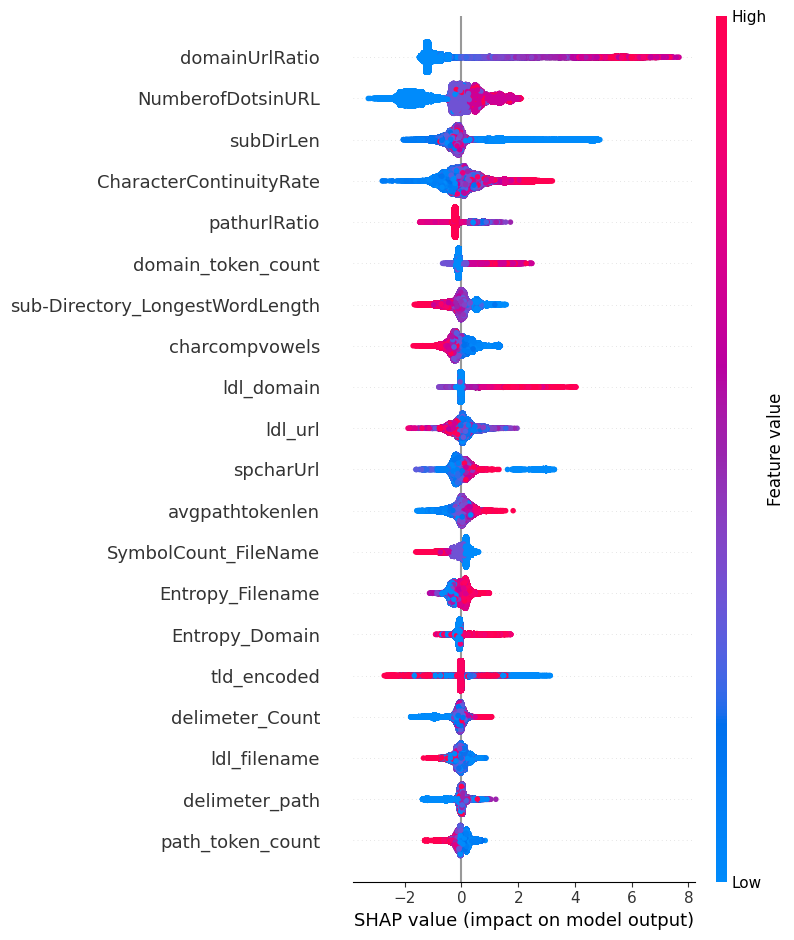

ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [21]:
import shap  # Import SHAP
# SHAP Analysis for the binary classifier
explainer = shap.Explainer(xgb_binary_classifier)
shap_values = explainer(X_test_bin)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test_bin, feature_names=X.columns)

# You can also visualize a specific prediction
# Example for the first test instance
shap.initjs()  # Initialize JS for SHAP visualization
shap.force_plot(explainer.expected_value, shap_values[0], X_test_bin.iloc[0], feature_names=X.columns)

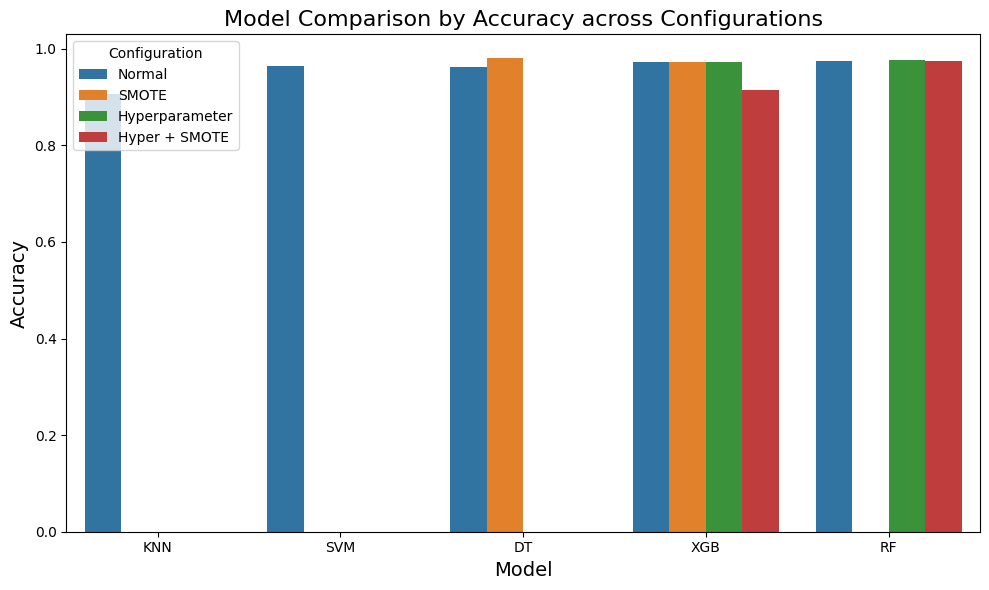

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Example DataFrame (replace with your actual results)
data = {
    'Model': ['KNN', 'SVM', 'DT', 'DT', 'XGB', 'XGB', 'XGB', 'XGB', 'RF','RF','RF'],
    'Config': ['Normal', 'Normal', 'SMOTE', 'Normal', 'Normal', 'Hyperparameter','SMOTE', 'Hyper + SMOTE',
               'Normal', 'Hyperparameter', 'Hyper + SMOTE'],
    'Accuracy': [0.9054, 0.9639, 0.9808, 0.9613, 0.973,0.973, 0.972, 0.914, 0.975,0.9757,0.9752]
}
df = pd.DataFrame(data)

# Grouped Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Config', data=df)

# Customize plot
plt.title('Model Comparison by Accuracy across Configurations', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(title='Configuration')
plt.tight_layout()
plt.show()


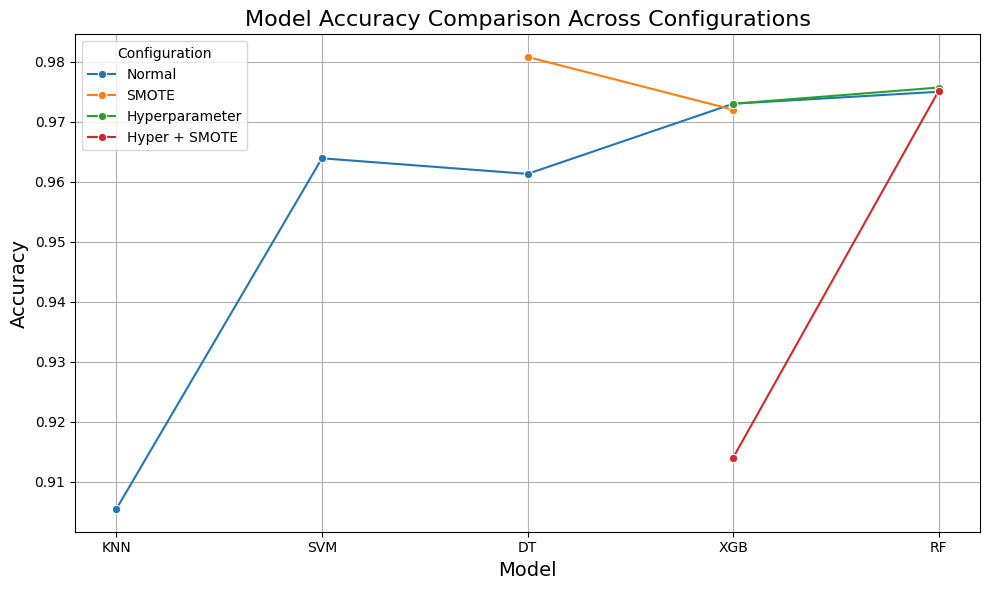

In [2]:
# Line Plot
plt.figure(figsize=(10, 6))

# Plot for each configuration
sns.lineplot(x='Model', y='Accuracy', hue='Config', data=df, marker="o")

# Customize plot
plt.title('Model Accuracy Comparison Across Configurations', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(title='Configuration')
plt.grid(True)
plt.tight_layout()
plt.show()


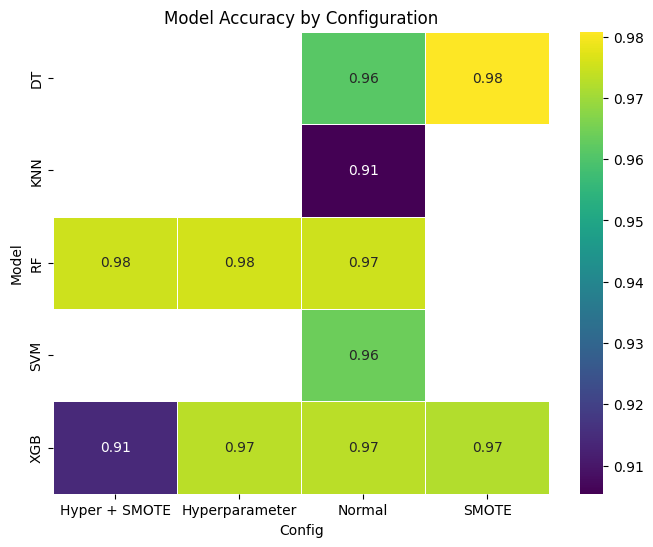

In [7]:
# Assuming df is a DataFrame with columns 'Model', 'Config', and 'Accuracy'
pivot_table = df.pivot(index="Model", columns="Config", values="Accuracy")

# Plot the heatmap using seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="viridis", linewidths=0.5)
plt.title("Model Accuracy by Configuration")
plt.show()


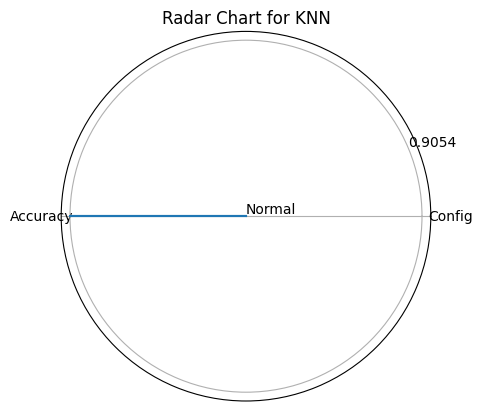

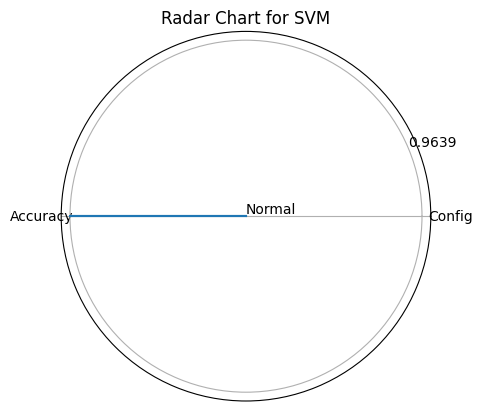

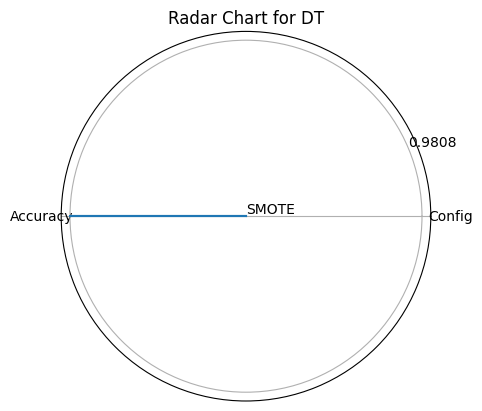

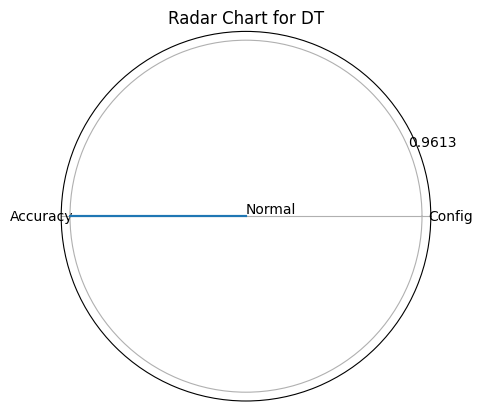

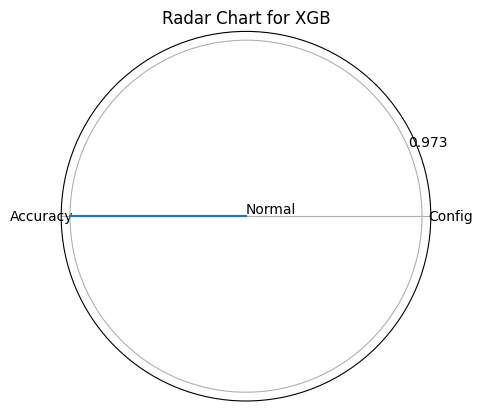

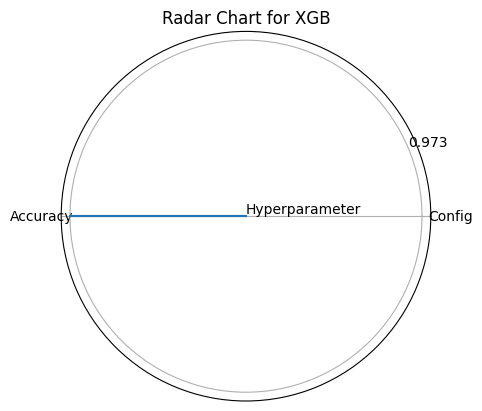

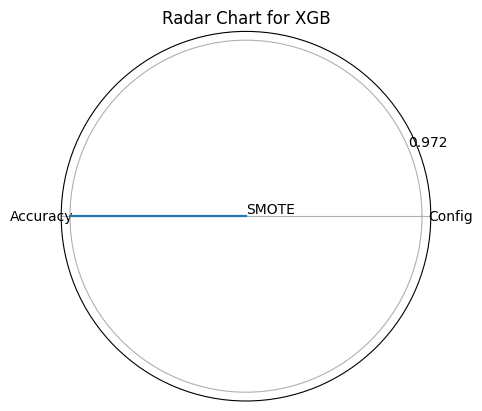

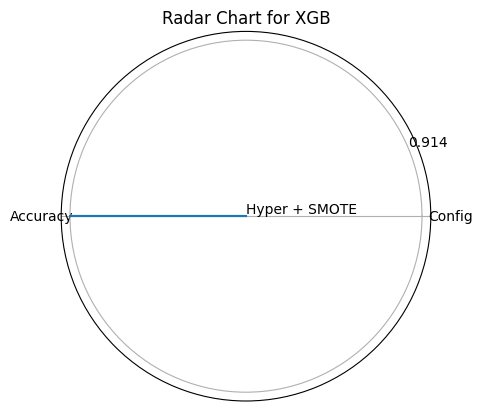

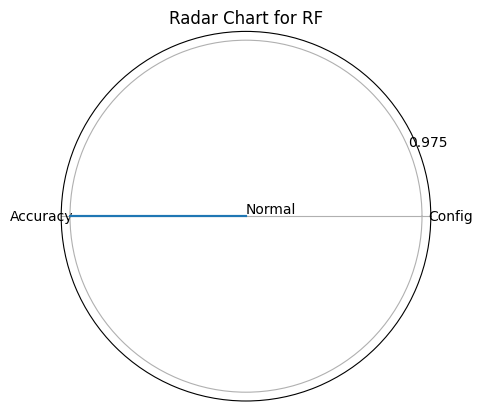

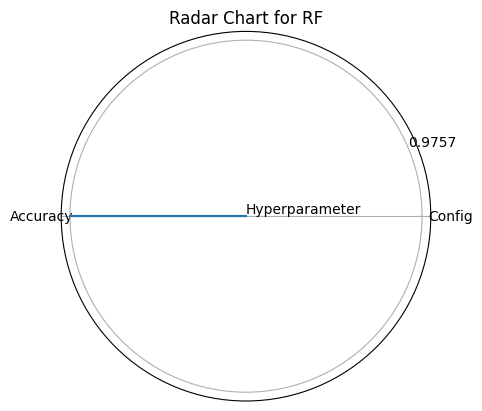

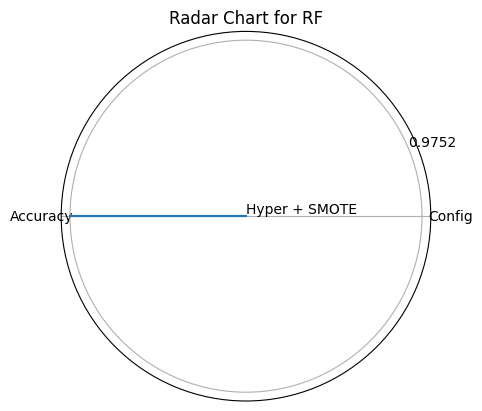

In [5]:
from math import pi

def make_radar_chart(df, model_index):
    categories = list(df.columns[1:])
    N = len(categories)

    # Values for the selected model
    values = df.loc[model_index].drop('Model').values.flatten().tolist()
    values += values[:1]

    # Create an angle for each metric
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialize radar chart
    ax = plt.subplot(111, polar=True)
    
    # Draw one radar chart per model
    plt.xticks(angles[:-1], categories)

    # Plot and fill
    ax.plot(angles, values)
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(f"Radar Chart for {df['Model'][model_index]}")
    plt.show()

# Plot radar chart for each model
for i in range(len(df)):
    make_radar_chart(df, i)